<a href="https://colab.research.google.com/github/MorozovDesu/DataAnalysis_methods/blob/main/LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

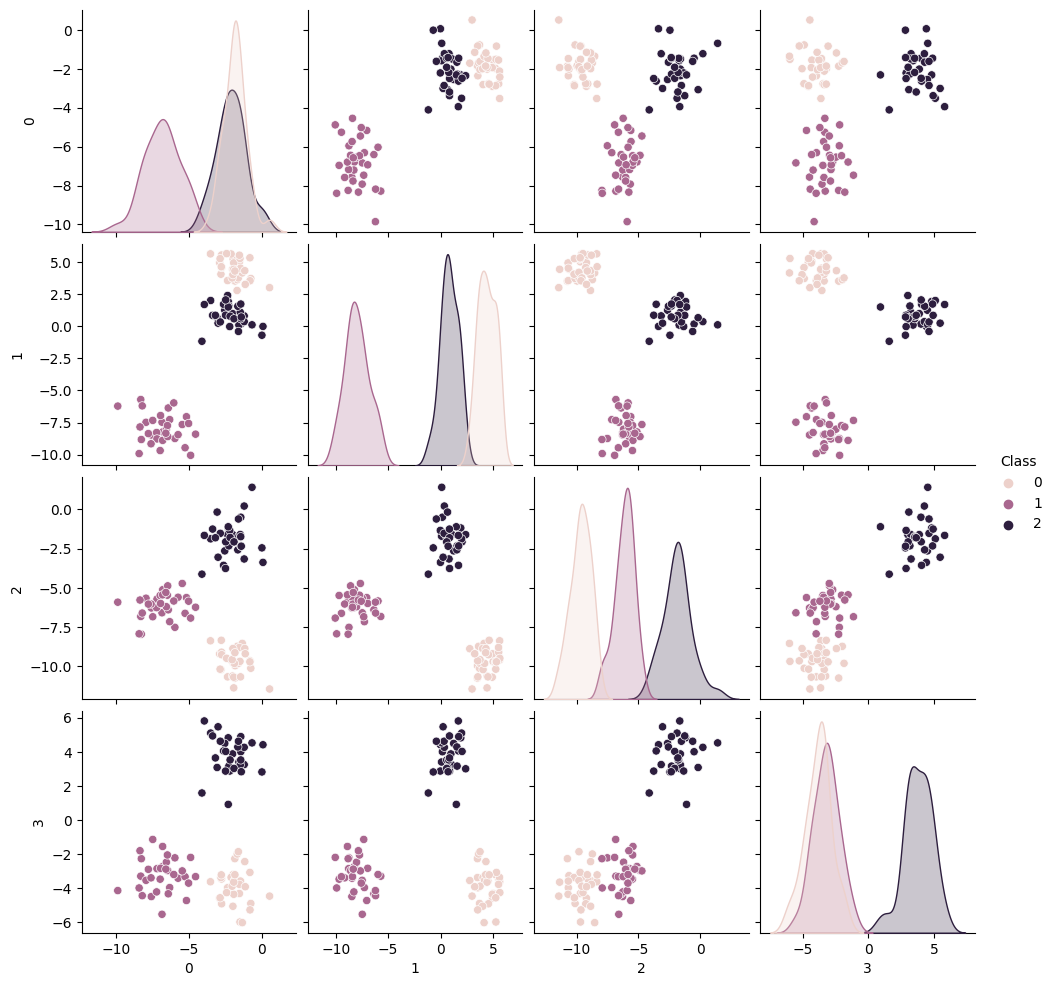

In [ ]:
N=3 #Число кластеров
D=4 #Число признаков
X,y=make_blobs(n_samples=100,centers=N,n_features=D,random_state=1, cluster_std=1)
#посчитать матрицу различий confusion_matrix(y,y_predict) выведит матрицу  from sklearn.metrics import confusion_matrix, accuracy_score
df=pd.DataFrame(X)
df['Class']=y
#Строим диаграммы рассеяния
sns.pairplot(df,hue='Class')


In [ ]:
#Выполним стандартизацию данных и выведем результат
sc = StandardScaler()
del[df['Class']]
df_t = pd.DataFrame(sc.fit_transform(df))
df_t.describe()


,0,1,2,3
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-7.860379e-16,-2.664535e-17,7.036038e-16,-1.887379e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.530394e+00,-1.737675e+00,-1.656536e+00,-1.366463e+00
25%,-9.637705e-01,-1.214558e+00,-9.547078e-01,-7.255761e-01
50%,4.284250e-01,3.202992e-01,-3.138750e-02,-5.052497e-01
75%,7.663575e-01,8.690913e-01,1.016115e+00,1.158239e+00
max,1.653087e+00,1.233214e+00,2.203569e+00,1.930070e+00


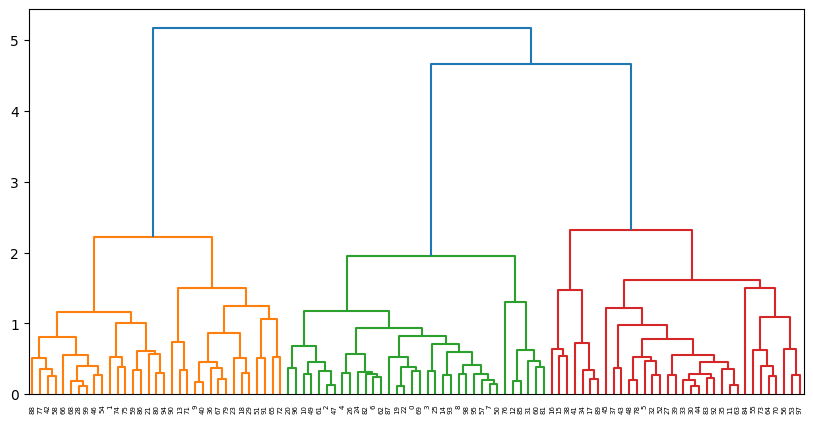

In [ ]:
#Выполним иерархическую кластеризацию
row_dist=pdist(df_t,metric='euclidean')
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(10,5))
#Построение дендрограммы
dendrogram(mergings)
plt.show()



In [ ]:
# добавить агламератив кластеринг 
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


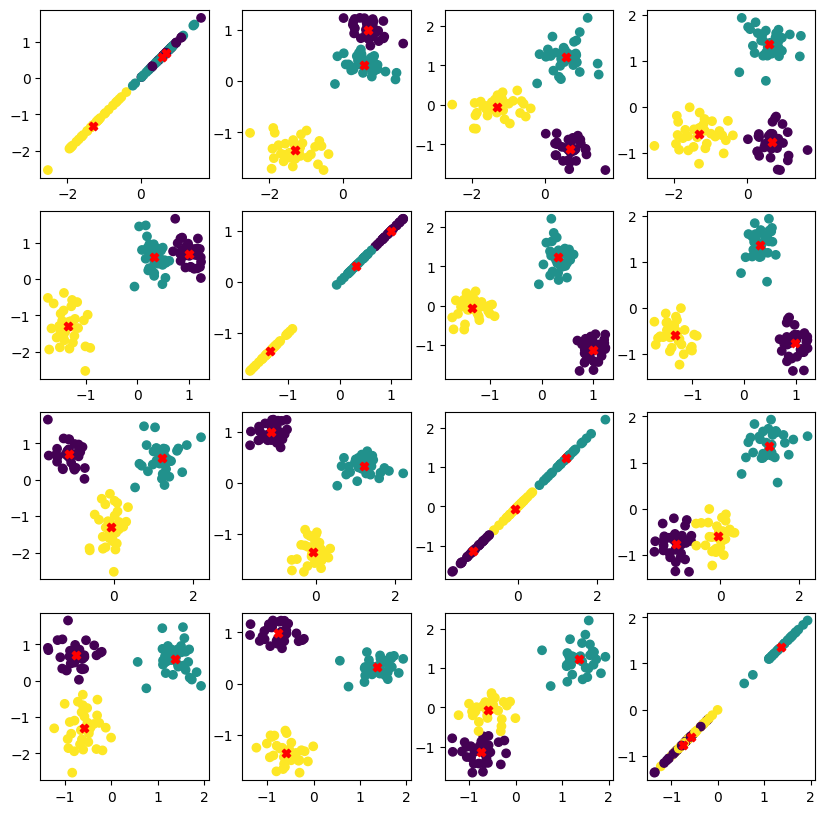

In [ ]:
#Выполним кластеризацию методом k-средних, выведем диаграммы рассеяния, нанесем центры кластеров
model = KMeans(n_clusters=N, max_iter=1000)
model.fit(df_t)
y=model.predict(df_t)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(df_t[i],df_t[j],c=y)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j], marker='X', c='red')

<class 'list'>


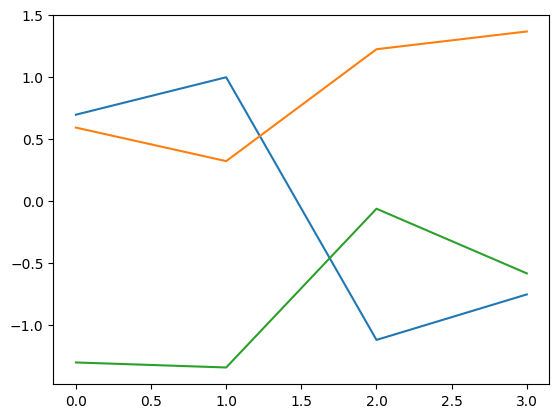

In [ ]:
c=model.cluster_centers_
print(list)
for i in range(N):
    plt.plot(df_t.columns,c[i],'-')

In [ ]:
#Создадим функцию, реализующую инструмент для графического отображения результатов дискриминантного анализа – решающих поверхностей и отображения данных
def lda_qda(field1, field2, type_model,k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    x=df_t[[field1, field2]].values #определим данные
    df_t['Class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный    
    model=type_model
    #построим модель    
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t[field1].min()-1, df_t[field1].max()+1
    min2, max2 = df_t[field2].min()-1, df_t[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t[field1],df_t[field2],c=y)
    #оценка точности модели
    plt.title(model.score(x,y)) 
    return splot

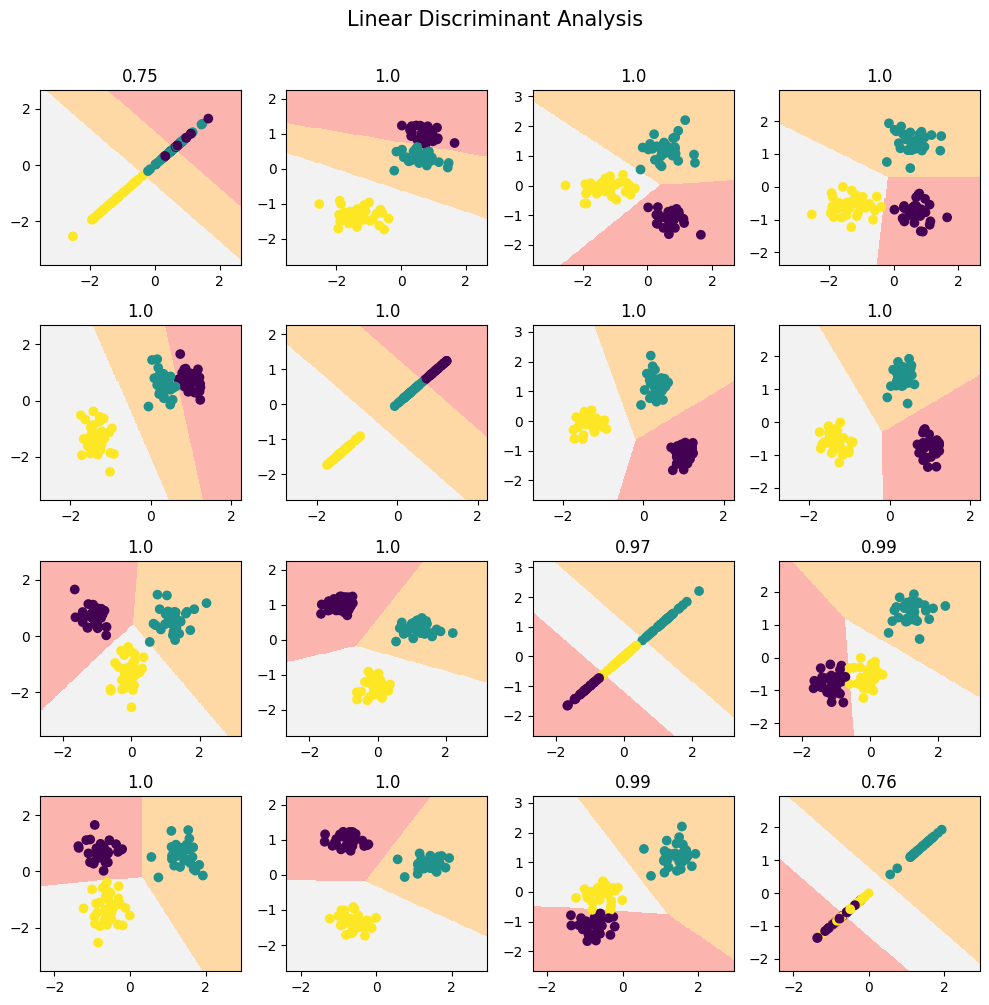

In [ ]:
#Проведем линейный дискриминантный анализ данных.
#Для каждой пары признаков выведем на экран решающие поверхности и данные, 
#для каждой пары признаков оценим точность модели дискриминантного анализа
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis',y=1, fontsize=15)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda 
k=0
for i in range(D):
    for j in range (D):
        k=k+1 
        splot=lda_qda(i, j,lda(),k) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


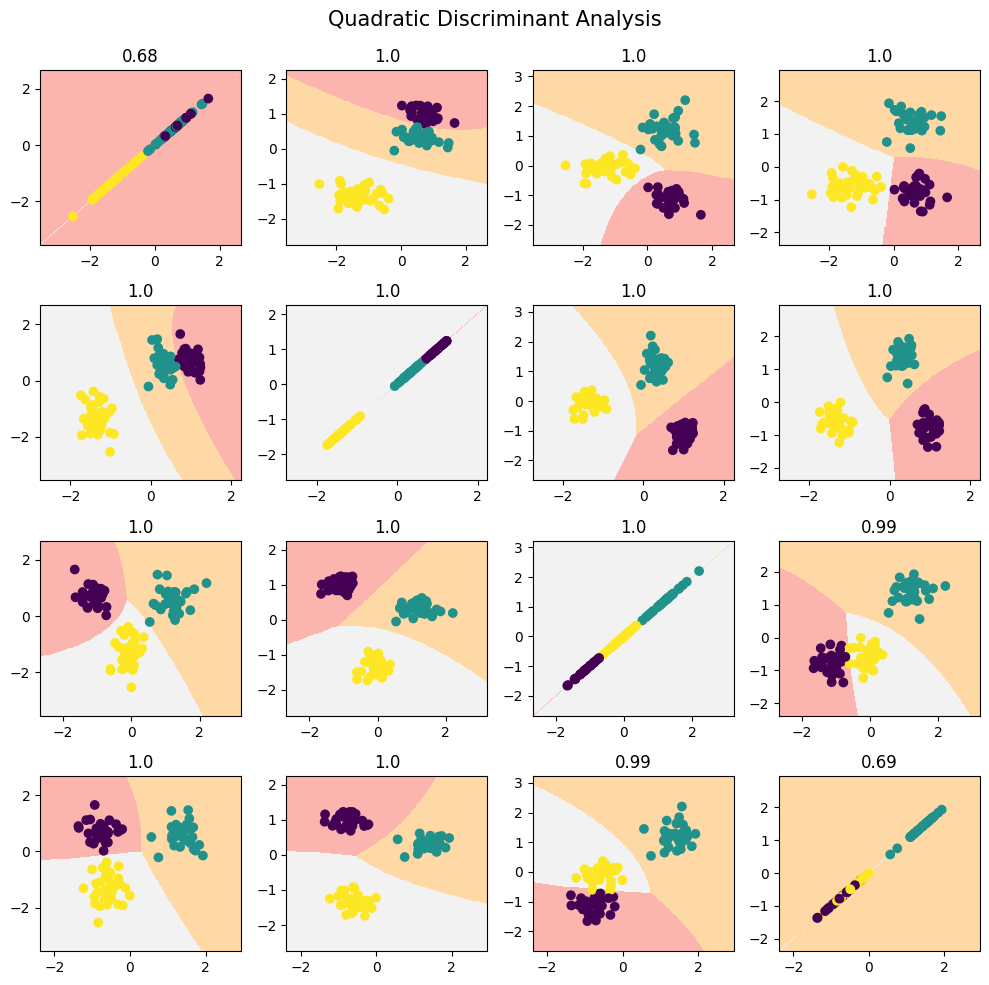

In [ ]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis',y=0.98, fontsize=15)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda 
k=0
for i in range(D):
    for j in range (D):
        k=k+1 
        splot=lda_qda(i, j,qda(),k) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


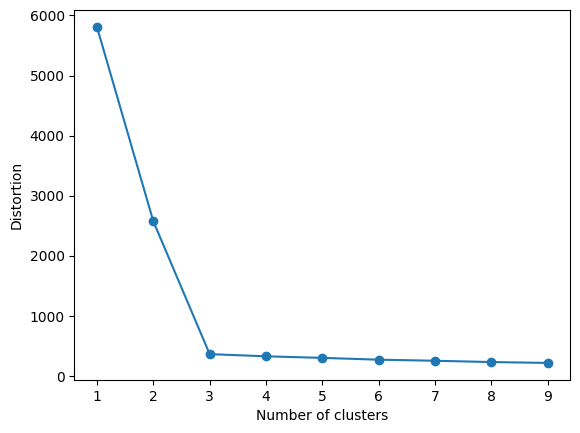

Сумма квадратов расстояний до центров кластеров: 365.05


In [ ]:
#Используя сумму квадратов растояний до центров оценить качество кластеризации
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
#на графике видно, что после 3 точек сумма квадратов уменьшается медленно, значит число кластеров подобрано верно

#Другой метод
kmeans = KMeans(n_clusters=N, n_init=10)
kmeans.fit(X)
clusters_inertia = kmeans.inertia_
#Чем меньше значение clusters_inertia, тем лучше кластеризация
print(f'Сумма квадратов расстояний до центров кластеров: {clusters_inertia:.2f}')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


AttributeError: ignored